In [3]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class FinData:
    def __init__(self, name, IDnumber, date, type, data, filename):
        self.name = name
        self.ID = IDnumber 
        self.date = date
        self.type = type
        self.data = data
        self.file = filename

In [5]:
def getdate(df):
    time = df.Time.str.split(pat=None,n=7,expand=False,regex=None)
    date = df.Time.get(1)
    date = date.split(" ")[0]
    year = int(date[0:2])+2000
    calendar = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    month = calendar[int(date[3:4])]
    day = date[4:6]
    cal_date = (month + " " + str(day) + ", " + str(year))
    return date, cal_date

In [6]:
def normalizetime(df):
    starttime = df.Time[1]
    starttime = (int(starttime[0:2])*3600) + (int(starttime[3:5])*60) + (int(starttime[6:8])) + (int(starttime[9:])/1000)
    for i in range(1,len(df)):
        time = df.Time[i]
        df.Time[i] = (int(time[0:2])*3600) + (int(time[3:5])*60) + (int(time[6:8])) + (int(time[9:])/1000)
        df.Time[i] = df.Time[i]-starttime

In [98]:
def importnewdata(filename):
    nanvalue = float("NAN")
    df = pd.read_excel(filename)
    df.replace(0,nanvalue,inplace=True)
    df.Yaw.replace(nanvalue, 0, inplace=True)
    df.dropna(axis=1, inplace=True)
    (date, cal_date) = getdate(df)
    df.Time = df.Time.str.removeprefix(date)
    df.Time = df.Time.str.removeprefix(" ")
    normalizetime(df)
    return df

In [97]:
#Fin1 = FinData("fin1", "1", importnewdata("050721_153235_WingletFin_115fps.xlsx")[1], "wonky", importnewdata("050721_153235_WingletFin_115fps.xlsx")[0], importnewdata("050721_153235_WingletFin_115fps.xlsx")[2])

In [ ]:
Fin1.data

In [ ]:
def plotreal():
	# the figure that will contain the plot 
	fig = Figure(figsize = (5, 5), dpi = 100) 

	# list of squares 
	y = [i**2 for i in range(101)] 

	# adding the subplot 
	plot1 = fig.add_subplot(111) 

	# plotting the graph 
	plot1.plot(y) 

	# creating the Tkinter canvas 
	# containing the Matplotlib figure 
	canvas = FigureCanvasTkAgg(fig, frame) 
	canvas.draw() 

	# placing the canvas on the Tkinter window 
	canvas.get_tk_widget().pack() 

In [18]:
savepath ="/Users/sethgerow/Desktop/PythonScripts/ShredDatabase.xlsx"
with pd.ExcelWriter(savepath, mode="a", engine="openpyxl", if_sheet_exists="replace",) as writer:
    Fin1.data.to_excel(writer, sheet_name=Fin1.name)  

In [100]:
df1 = importnewdata("021920_164435_50mps_Fin_1.xlsx")
df12 = pd.read_excel("021920_164435_50mps_Fin_1.xlsx")
df12.replace(0,float("NAN"),inplace=True)
df12.Yaw.replace(float("NAN"), 0, inplace=True)


In [ ]:
df2 = importnewdata("022020_154534_50mps_Fin_5.xlsx")
df3 = importnewdata("050721_153235_WingletFin_115fps.xlsx")
print(len(df1.columns))
print(len(df2.columns))
print(len(df3.columns))
print(df2.columns)
df1

In [71]:
columns = []
for i in range(0, len(df.columns)):
    columns.append(i)
colnames = df.columns.values
print(len(colnames))
len(columns)
print(len(df))

37
32


In [124]:
data = df.iloc[[1],2:].values.tolist()
data[0][1]
df

,Type,Units,Time,Z Encoder,WAFBC Drag,WAFBC Side,WAFBC Lift,WAFBC Roll,WAFBC Pitch,WAFBC Yaw,...,Dynamic Pressure,Mach,Reynolds Number per ft,Velocity Setpoint,Temperature Setpoint,cRIO AI0,cRIO AI1,cRIO AI2,cRIO AI3,Drag (raw)
0,Type,USC / SI,Time,Inches / Millimeters,lb / N,lb / N,lb / N,ft-lb / N-m,ft-lb / N-m,ft-lb / N-m,...,PSId / Pascals,/,1/ft / 1/ft,ft/s / m/s,F / F,/,/,/,/,/
1,Sing,USC,0.0,0.000079,0.255413,-2.939696,0.879402,4.551305,-0.50661,-0.122066,...,0.105275,0.101256,691354.409375,115,74.360113,-10.422729,10.314362,0.001481,-10.375275,-0.001123
2,Sing,USC,11.701,0.000079,0.217133,-2.589614,0.761176,4.049719,-0.390417,-0.118488,...,0.105471,0.101356,691886.0075,115,74.402714,-10.422729,10.314362,0.001442,-10.375275,-0.000897
3,Sing,USC,23.396,0.000079,0.187159,-2.212575,0.637315,3.482677,-0.299292,-0.124397,...,0.105707,0.10146,692657.5775,115,74.443441,-10.422729,10.314362,0.00145,-10.375275,-0.000742
4,Sing,USC,35.098,0.000079,0.154219,-1.812852,0.569926,2.876183,-0.198951,-0.125644,...,0.105739,0.101477,692681.615,115,74.483152,-10.422729,10.314362,0.001439,-10.375275,-0.000569
5,Sing,USC,46.796,0.000079,0.129357,-1.425167,0.484784,2.289286,-0.115661,-0.132601,...,0.105934,0.101564,693301.130625,115,74.522087,-10.422729,10.314362,0.001464,-10.375275,-0.000479
6,Sing,USC,58.501,0.000079,0.114647,-1.044207,0.398752,1.699817,-0.099108,-0.145622,...,0.105919,0.101562,693151.490625,115,74.559508,-10.422729,10.314362,0.00148,-10.375275,-0.000437
7,Sing,USC,70.193,0.000079,0.104757,-0.656948,0.314905,1.149903,-0.033216,-0.150691,...,0.105926,0.101567,693104.509375,115,74.596343,-10.422729,10.314362,0.001428,-10.375275,-0.000427
8,Sing,USC,81.897,0.000079,0.100041,-0.301593,0.241597,0.594062,0.019662,-0.146675,...,0.105896,0.101557,692923.035,115,74.630288,-10.422729,10.314362,0.001459,-10.375275,-0.000432
9,Sing,USC,93.593,0.000079,0.090684,0.036501,0.18609,0.06824,0.076092,-0.154888,...,0.105939,0.101577,693013.259375,115,74.663523,-10.422729,10.314362,0.001437,-10.375275,-0.000437


In [126]:
df.iloc[1:,2]

1         0.0
2      11.701
3      23.396
4      35.098
5      46.796
6      58.501
7      70.193
8      81.897
9      93.593
10    105.398
11    117.097
12    128.795
13    140.496
14    152.198
15    163.997
16    175.697
17      187.4
18    199.098
19    210.798
20    222.496
21    234.192
22    245.895
23    257.592
24    269.293
25    280.995
26    292.694
27    304.396
28    316.096
29    327.797
30    339.496
31    351.296
Name: Time, dtype: object

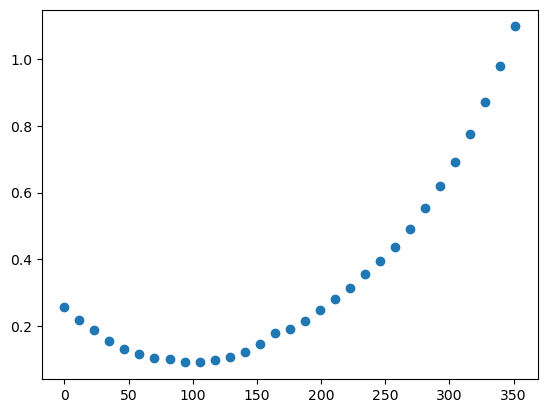

In [127]:
plt.scatter(df.iloc[1:,2], df.iloc[1:,4])
plt.show()